In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/Drive/My Drive/Application of ML in industries/Lab2 Housing price prediction/train.csv')
test=pd.read_csv('/content/Drive/My Drive/Application of ML in industries/Lab2 Housing price prediction/test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Getting dimensions and different attributes from dataset**

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.drop(['Id'],axis=1,inplace=True)

In [ ]:
test.drop(['Id'],axis=1,inplace=True)

Checking if there are null values in data or not

In [ ]:
print(df.isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [ ]:
df.isnull().sum().sum()

6965

There are too many null values in the dataset and too many columns

In [ ]:
corr = df.corr()
sorted(corr['SalePrice'])

[-0.1359073708421417,
 -0.12857795792595636,
 -0.08428413512659523,
 -0.0778558940486776,
 -0.028922585168730426,
 -0.02560613000068015,
 -0.02118957964030379,
 -0.016844154297359294,
 -0.011378121450215216,
 0.04458366533574792,
 0.04643224522381936,
 0.09240354949187278,
 0.11144657114291048,
 0.1682131543007415,
 0.214479105546969,
 0.22712223313149718,
 0.2638433538714063,
 0.2841076755947784,
 0.31585622711605577,
 0.31933380283206614,
 0.32441344456813076,
 0.35179909657067854,
 0.38641980624215627,
 0.4669288367515242,
 0.4774930470957107,
 0.48636167748786213,
 0.5071009671113867,
 0.5228973328794967,
 0.5337231555820238,
 0.5606637627484452,
 0.6058521846919166,
 0.6135805515591944,
 0.6234314389183598,
 0.640409197258349,
 0.7086244776126511,
 0.7909816005838047,
 1.0]

Now we will divide Attributes based on categorical or numerical data for better understanding of data

cont_df

Now since categorical columns got different from numerical column now we can analyse the data more accurately

**Now to check Skewness of data, Plotting histogram for all the numerical columns**

In [ ]:
len(cont_df)

37

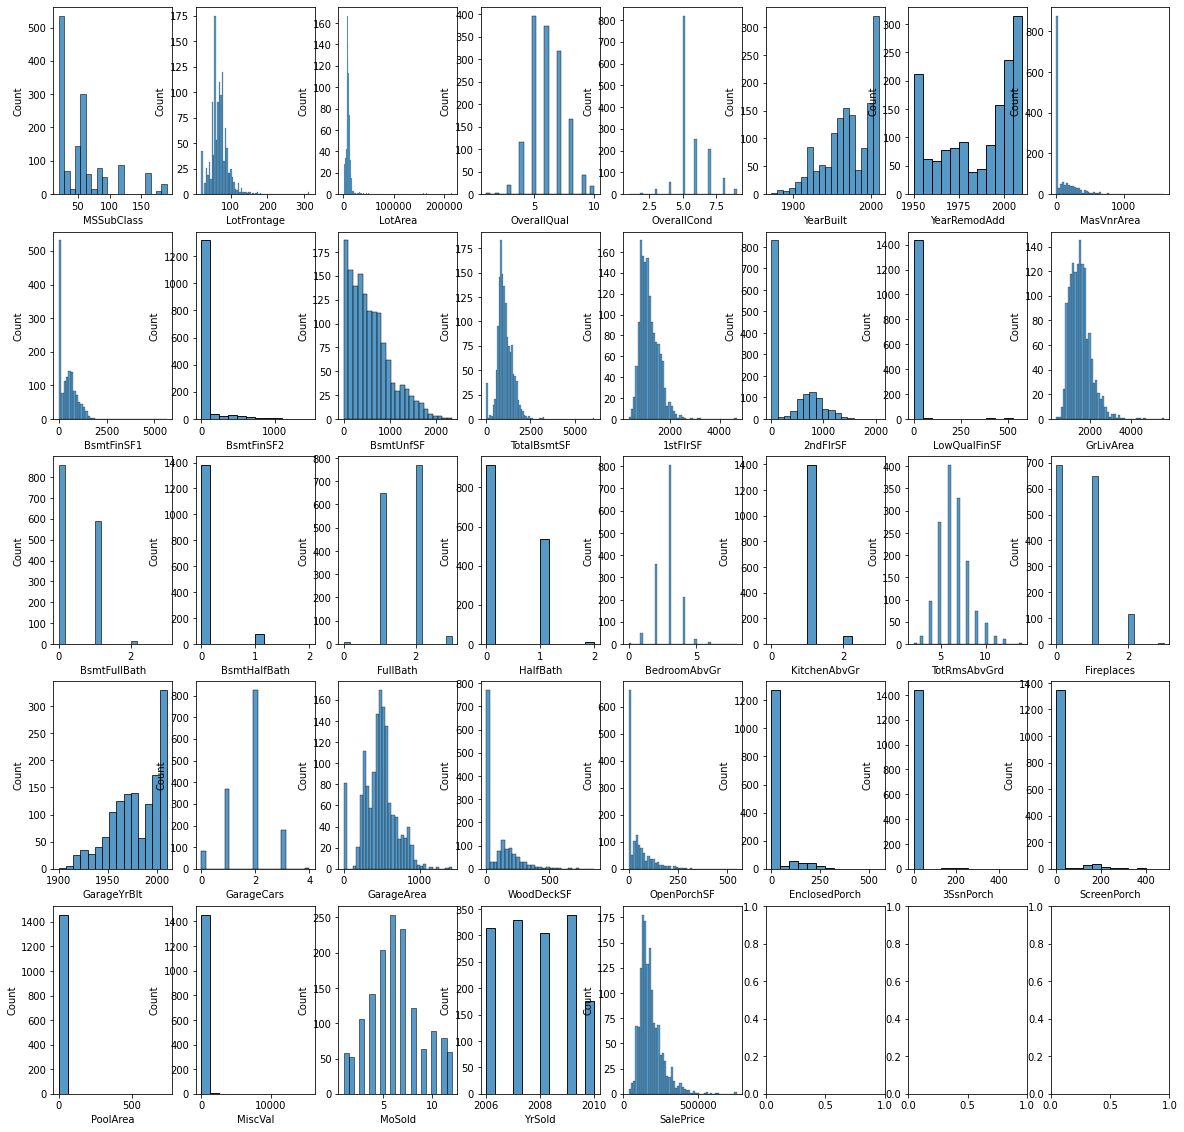

In [ ]:
fig, ax1 = plt.subplots(5,8, figsize=(20,20))
k=0
for i in range(5):
  for j in range(8):
    if k<37:
      sns.histplot(df[cont_df[k]], ax= ax1[i][j])
      k+=1;


From the above graphs we concluded that 
1.   In most of the columns scale varies widely so we need to standardize the data
2.   Attributes like Enclosed porch, their values and overwhelmingly near to 0, therefore they may contribute much in price prediction
3. attributes like year built are left skewed 







In [ ]:
list1=['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtHalfBath','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
desc1 = df[list1].describe().transpose()
desc1['coeff_of_var'] = desc1['std']/desc1['mean']
desc1

,count,mean,std,min,25%,50%,75%,max,coeff_of_var
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.50,215245.0,0.949076
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.00,1600.0,1.746306
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.0,383.5,712.25,5644.0,1.028082
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.0,0.0,0.00,1474.0,3.465556
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.0,477.5,808.00,2336.0,0.778977
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.0,0.0,0.00,572.0,8.319430
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.0,0.0,0.00,2.0,4.149748
WoodDeckSF,1460.0,94.244521,125.338794,0.0,0.0,0.0,168.00,857.0,1.329932
OpenPorchSF,1460.0,46.660274,66.256028,0.0,0.0,25.0,68.00,547.0,1.419967
EnclosedPorch,1460.0,21.954110,61.119149,0.0,0.0,0.0,0.00,552.0,2.783950


In [ ]:
dropped_columns = desc1[desc1['coeff_of_var']>3].T.columns
dropped_columns

Index(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [ ]:
df.drop(dropped_columns,axis=1, inplace=True)
test.drop(dropped_columns,axis=1, inplace=True)

**Dealing with the missing values**

In [ ]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        if df[i].dtypes == 'object':
            print(i)
            print('Total number of null values:',df[i].isnull().sum())
            print('Null values as precentage of total:',round((df[i].isnull().sum()*100)/df['SalePrice'].count(),1)) 
            print()

Alley
Total number of null values: 1369
Null values as precentage of total: 93.8

MasVnrType
Total number of null values: 8
Null values as precentage of total: 0.5

BsmtQual
Total number of null values: 37
Null values as precentage of total: 2.5

BsmtCond
Total number of null values: 37
Null values as precentage of total: 2.5

BsmtExposure
Total number of null values: 38
Null values as precentage of total: 2.6

BsmtFinType1
Total number of null values: 37
Null values as precentage of total: 2.5

BsmtFinType2
Total number of null values: 38
Null values as precentage of total: 2.6

Electrical
Total number of null values: 1
Null values as precentage of total: 0.1

FireplaceQu
Total number of null values: 690
Null values as precentage of total: 47.3

GarageType
Total number of null values: 81
Null values as precentage of total: 5.5

GarageFinish
Total number of null values: 81
Null values as precentage of total: 5.5

GarageQual
Total number of null values: 81
Null values as precentage of t

checking null values in test set also

In [ ]:
test.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
                 ... 
MiscFeature      1408
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
Length: 72, dtype: int64

In [ ]:
test.isnull().sum().sum()

6997

In [ ]:
test.shape

(1459, 72)

In [ ]:
for i in test.columns:
    if test[i].isnull().sum()>0:
        if test[i].dtypes == 'object':
            print(i)
            print('Total null values:',test[i].isnull().sum())
            print('Null values as a % of total:',round((test[i].isnull().sum()*100)/df['SalePrice'].count(),1)) 
            print()

MSZoning
Total null values: 4
Null values as a % of total: 0.3

Alley
Total null values: 1352
Null values as a % of total: 92.6

Utilities
Total null values: 2
Null values as a % of total: 0.1

Exterior1st
Total null values: 1
Null values as a % of total: 0.1

Exterior2nd
Total null values: 1
Null values as a % of total: 0.1

MasVnrType
Total null values: 16
Null values as a % of total: 1.1

BsmtQual
Total null values: 44
Null values as a % of total: 3.0

BsmtCond
Total null values: 45
Null values as a % of total: 3.1

BsmtExposure
Total null values: 44
Null values as a % of total: 3.0

BsmtFinType1
Total null values: 42
Null values as a % of total: 2.9

BsmtFinType2
Total null values: 42
Null values as a % of total: 2.9

KitchenQual
Total null values: 1
Null values as a % of total: 0.1

Functional
Total null values: 2
Null values as a % of total: 0.1

FireplaceQu
Total null values: 730
Null values as a % of total: 50.0

GarageType
Total null values: 76
Null values as a % of total: 5.2

In [ ]:
cat_df

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

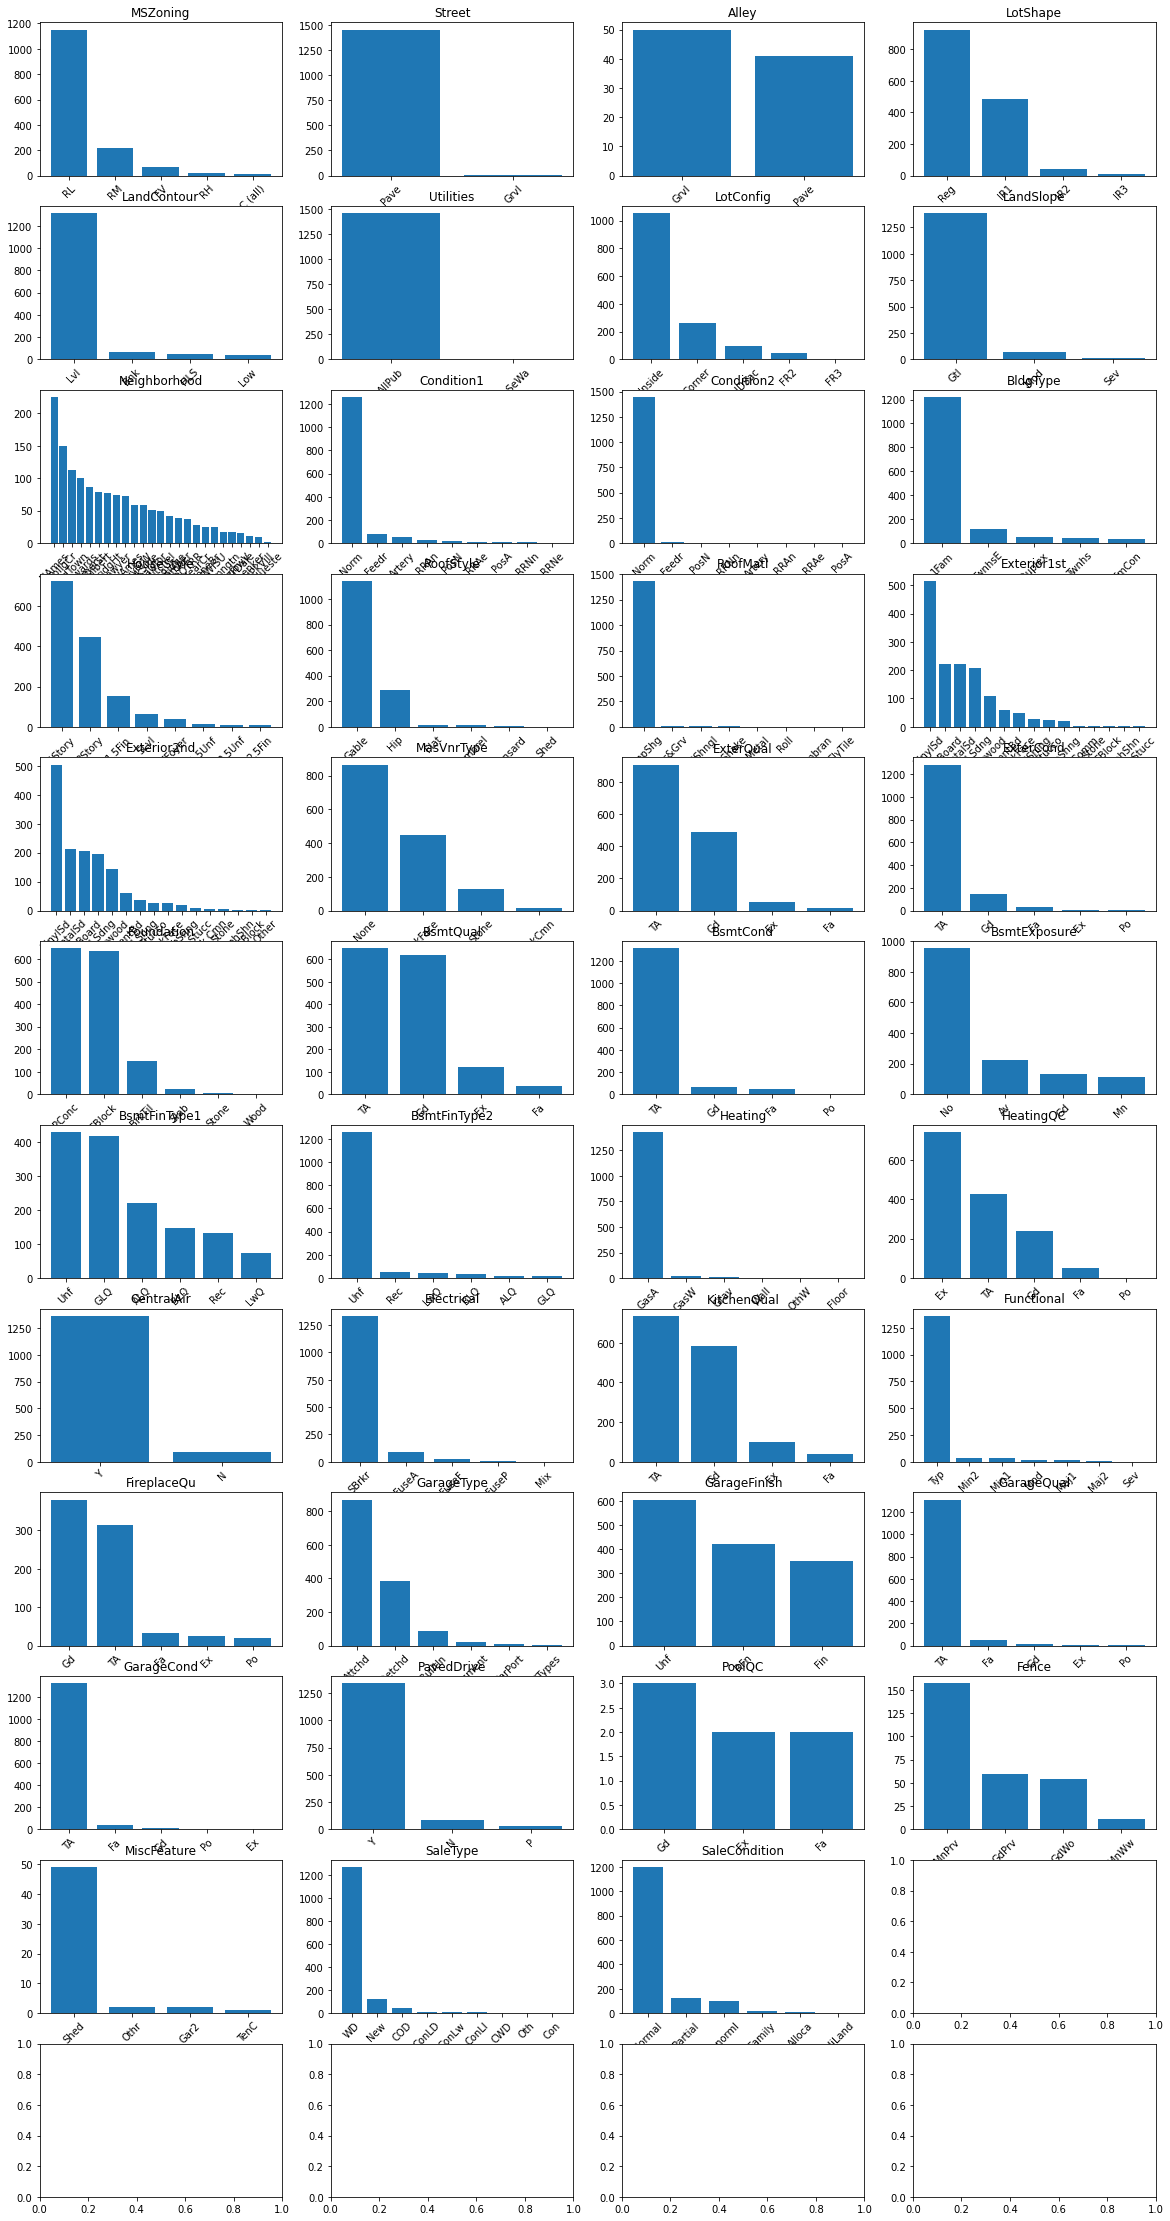

In [ ]:
f, axes = plt.subplots(12, 4, figsize=(20, 40))

for ax, col in zip(axes.ravel(), cat_df):
    y = df[col].value_counts()
    ax.bar(y.index, y)
    ax.set_title(col)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

Label encoding the object columns


In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
a = df.dtypes=='object'

In [ ]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 73, dtype: int64

dealing with missing values


In [ ]:
# impute the missing values using median
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace =True)

df['BsmtQual'].fillna('No Basement', inplace=True)
df['BsmtCond'].fillna('No Basement', inplace=True)
df['BsmtExposure'].fillna('No Basement', inplace=True)
df['BsmtFinType1'].fillna('No Basement', inplace=True)
df['BsmtFinType2'].fillna('No Basement', inplace=True)

df['GarageType'].fillna('No Garage', inplace=True)
df['GarageFinish'].fillna('No Garage', inplace=True)
df['GarageQual'].fillna('No Garage', inplace=True)
df['GarageCond'].fillna('No Garage', inplace=True)

df['PoolQC'].fillna('No Pool', inplace=True)
df['Fence'].fillna('No Fence', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)
df['MasVnrType'].fillna('None', inplace=True)
df['FireplaceQu'].fillna('No Fireplace', inplace=True)

df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

df['Alley'].fillna('No Access', inplace=True)
df.drop(['GarageYrBlt'],axis=1,inplace=True)

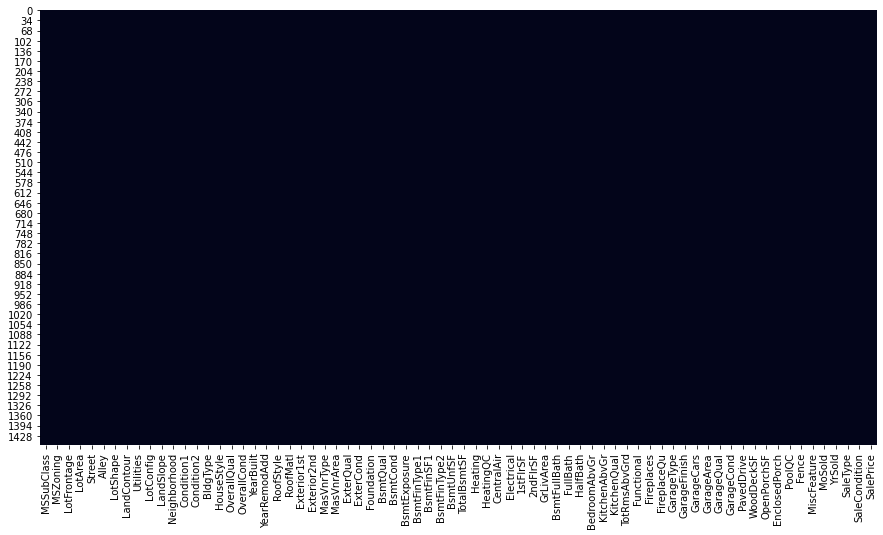

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
test.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
                 ... 
MiscFeature      1408
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
Length: 72, dtype: int64

In [ ]:
test.isnull().sum().sum()

6997

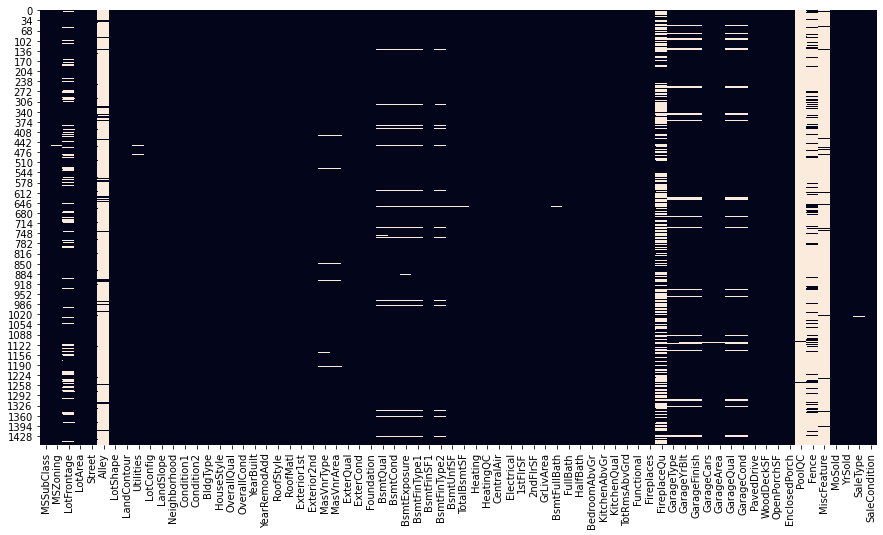

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(test.isnull(), cbar=False)

In [ ]:
test['LotFrontage'].fillna(test['LotFrontage'].median(),inplace =True)
test['Alley'].fillna('No Access', inplace=True)

test['BsmtQual'].fillna('No Basement', inplace=True)
test['BsmtCond'].fillna('No Basement', inplace=True)
test['BsmtExposure'].fillna('No Basement', inplace=True)
test['BsmtFinType1'].fillna('No Basement', inplace=True)
test['BsmtFinType2'].fillna('No Basement', inplace=True)

test['GarageType'].fillna('No Garage', inplace=True)
test['GarageFinish'].fillna('No Garage', inplace=True)
test['GarageQual'].fillna('No Garage', inplace=True)
test['GarageCond'].fillna('No Garage', inplace=True)

test['PoolQC'].fillna('No Pool', inplace=True)
test['Fence'].fillna('No Fence', inplace=True)
test['MiscFeature'].fillna('None', inplace=True)
test['MasVnrType'].fillna('None', inplace=True)
test['FireplaceQu'].fillna('No Fireplace', inplace=True)

#Categorical features 
test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0], inplace=True)
test['Electrical'].fillna(test['Electrical'].mode()[0], inplace=True)
test['MSZoning'].fillna(test['MSZoning'].mode()[0], inplace=True)
test['Utilities'].fillna(test['Utilities'].mode()[0], inplace=True)
test['SaleType'].fillna(test['SaleType'].mode()[0], inplace=True)
test['Functional'].fillna(test['Functional'].mode()[0], inplace=True)
test['KitchenQual'].fillna(test['KitchenQual'].mode()[0], inplace=True)
#test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mode()[0], inplace=True)
test['Exterior1st'].fillna(test['Exterior1st'].mode()[0], inplace=True)
test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0], inplace=True)
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0], inplace=True)
#test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0], inplace=True)

test.drop(['GarageYrBlt'],axis=1,inplace=True)
test['GarageArea'].fillna(test['GarageArea'].median(),inplace =True)
test['GarageCars'].fillna(test['GarageCars'].mean(),inplace =True)
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median(),inplace =True)
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].median(),inplace =True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].median(),inplace =True)

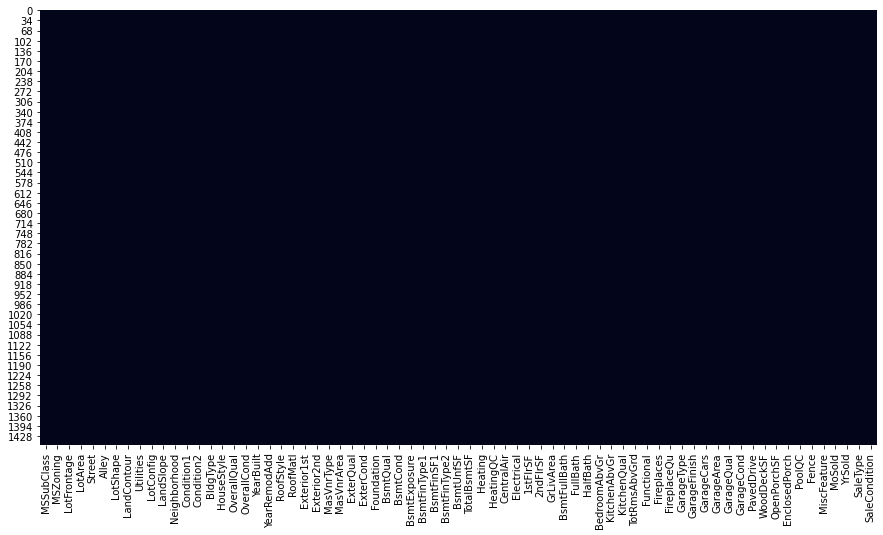

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(test.isnull(), cbar=False)

In [ ]:
test.isnull().sum().sum()

0

Plotting Heatmap

<function matplotlib.pyplot.plot>

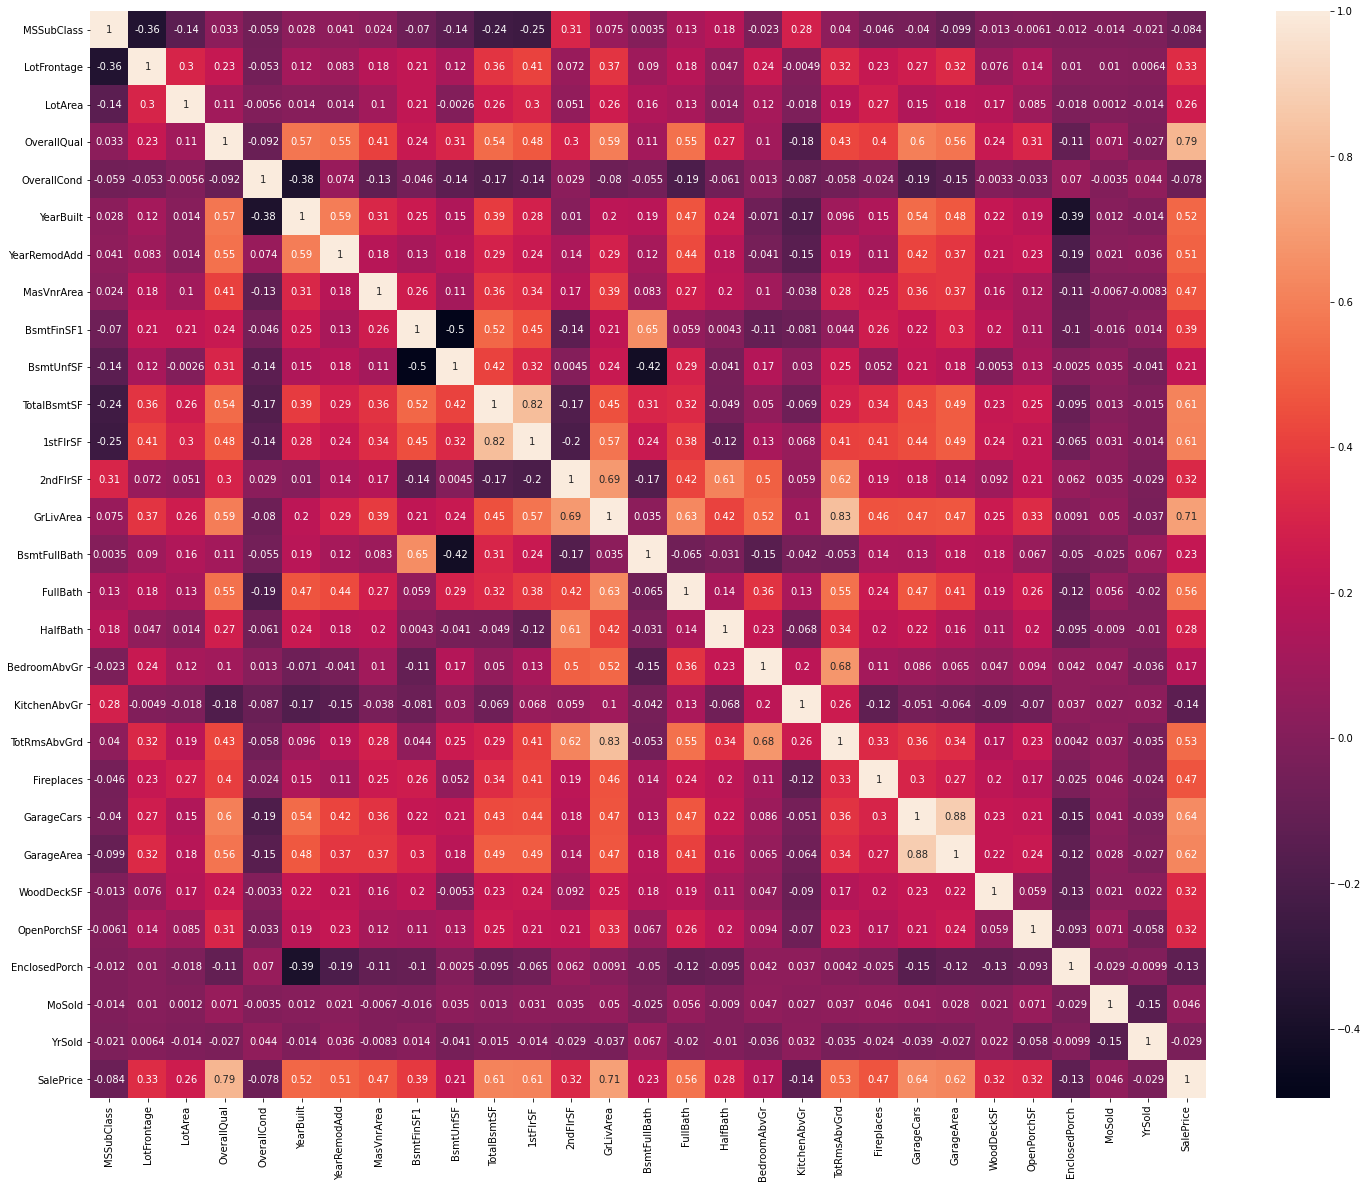

In [ ]:
cor=df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(cor,annot=True)
plt.plot

the dist is right skewed, ie it has many outliersspred out to the right

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.882876
Kurtosis: 6.536282


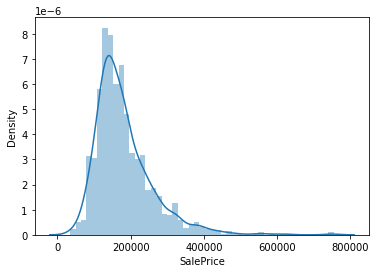

In [ ]:
sns.distplot(df['SalePrice']);
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

In [ ]:
num_feat = df.dtypes[df.dtypes != "object"].index
cat_feat = df.dtypes[df.dtypes == "object"].index
print(len(num_feat)," ",len(cat_feat))

29   43


In [ ]:
cor['SalePrice']>0.5

MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual       True
OverallCond      False
YearBuilt         True
YearRemodAdd      True
MasVnrArea       False
BsmtFinSF1       False
BsmtUnfSF        False
TotalBsmtSF       True
1stFlrSF          True
2ndFlrSF         False
GrLivArea         True
BsmtFullBath     False
FullBath          True
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd      True
Fireplaces       False
GarageCars        True
GarageArea        True
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
MoSold           False
YrSold           False
SalePrice         True
Name: SalePrice, dtype: bool

In [ ]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'PoolQC',
       'Fence',

Category Columns to numerical

In [ ]:
traincat = df.select_dtypes(include = ['object'])
traincat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
col_label = []
for col in df.columns:
    if df[col].dtypes == 'object':
        col_label.append(col)
for col in col_label:
    df[col]= LabelEncoder().fit_transform(df[col]) 
    test[col]= LabelEncoder().fit_transform(test[col]) 

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,150,856,1,0,1,4,856,854,1710,1,2,1,3,1,2,8,6,0,3,1,2,2,548,5,5,2,0,61,0,3,4,1,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,284,1262,1,0,1,4,1262,0,1262,0,2,0,3,1,3,6,6,1,5,1,2,2,460,5,5,2,298,0,0,3,4,1,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,434,920,1,0,1,4,920,866,1786,1,2,1,3,1,2,6,6,1,5,1,2,2,608,5,5,2,0,42,0,3,4,1,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216,6,540,756,1,2,1,4,961,756,1717,1,1,0,3,1,2,7,6,1,2,5,3,3,642,5,5,2,0,35,272,3,4,1,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,490,1145,1,0,1,4,1145,1053,2198,1,2,1,4,1,2,9,6,1,5,1,2,3,836,5,5,2,192,84,0,3,4,1,12,2008,8,4,250000


In [ ]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.0,3,4,1,4,4,3,5,468.0,3,270.0,882.0,0,4,1,3,896,0,896,0.0,1,0,2,1,3,5,6,0,3,1,3,1.0,730.0,4,5,2,140,0,0,2,2,1,6,2010,8,4
1,20,3,81.0,14267,1,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,4,4,3,0,923.0,6,406.0,1329.0,0,4,1,3,1329,0,1329,0.0,1,1,3,1,2,6,6,0,3,1,3,1.0,312.0,4,5,2,393,36,0,2,4,0,6,2010,8,4
2,60,3,74.0,13830,1,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,4,3,2,791.0,6,137.0,928.0,0,2,1,3,928,701,1629,0.0,2,1,3,1,3,6,6,1,5,1,0,2.0,482.0,4,5,2,212,34,0,2,2,1,3,2010,8,4
3,60,3,78.0,9978,1,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,4,4,3,2,602.0,6,324.0,926.0,0,0,1,3,926,678,1604,0.0,2,1,3,1,2,7,6,1,2,1,0,2.0,470.0,4,5,2,360,36,0,2,4,1,6,2010,8,4
4,120,3,43.0,5005,1,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,4,3,0,263.0,6,1017.0,1280.0,0,0,1,3,1280,0,1280,0.0,2,0,2,1,2,5,6,0,3,1,2,2.0,506.0,4,5,2,0,82,0,2,4,1,1,2010,8,4


In [ ]:
Y = df['SalePrice']
X = df.drop(['SalePrice'],axis=1)
from sklearn.model_selection import  train_test_split
X_train,X_dev,y_train,y_dev = train_test_split(X,Y,test_size = 0.3,random_state= 0)
X_train.shape,X_dev.shape,y_train.shape,y_dev.shape

((1022, 71), (438, 71), (1022,), (438,))

In [ ]:
X_train = StandardScaler().fit(X_train).transform(X_train)
X_dev = StandardScaler().fit(X_dev).transform(X_dev)
test = StandardScaler().fit(test).transform(test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
dev_pre = lr.predict(X_dev)
train_pre = lr.predict(X_train)
test_pre = lr.predict(test)

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_dev, dev_pre))
print(mean_squared_error(y_train, train_pre))
print(mean_squared_error(y_train, train_pre))

1704924677.1808202
721185649.9672235
721185649.9672235


In [ ]:
test_pre

array([121485.87700126, 175188.19912728, 182889.01572603, ...,
       175816.62871933, 125783.70329714, 236432.6349898 ])

In [ ]:
lr.score(X_train,y_train)

0.8817681190468614

In [ ]:
GBR = GradientBoostingRegressor(n_estimators = 1000 , max_depth = 5)
GBR.fit(X_train,y_train)
dev_pre = GBR.predict(X_dev)
train_pre = GBR.predict(X_train)
test_pre = GBR.predict(test)

In [ ]:
print(mean_squared_error(y_dev, dev_pre))
print(mean_squared_error(y_train, train_pre))
print(mean_squared_error(y_train, train_pre))

817328412.7447485
1559.2553717614148
1559.2553717614148


In [ ]:
test_pre

array([125451.69542079, 173697.1988855 , 190669.69919445, ...,
       170348.03465669, 113280.99820463, 226577.44827338])

In [ ]:
GBR.score(X_train,y_train)

0.9999997443741492

In [ ]:
RFR = RandomForestRegressor(n_estimators = 1000)
RFR.fit(X_train,y_train)
dev_pre = GBR.predict(X_dev)
train_pre = GBR.predict(X_train)
test_pre = GBR.predict(test)

In [ ]:
print(mean_squared_error(y_dev, dev_pre))
print(mean_squared_error(y_train, train_pre))
print(mean_squared_error(y_train, train_pre))

817328412.7447485
1559.2553717614148
1559.2553717614148


In [ ]:
test_pre

array([125451.69542079, 173697.1988855 , 190669.69919445, ...,
       170348.03465669, 113280.99820463, 226577.44827338])

In [ ]:
RFR.score(X_train,y_train)

0.9793100251017774